# Multiple Linear Regression
Shared Bikes Demand Prediction - Assignment Solution
Problem Statement:

A US bike-sharing provider BoomBikes has a daily dataset on the rental bikes based on various environmental and seasonal settings. It wishes to use this data to understand the factors affecting the demand for these shared bikes in the American market and come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown due to corona pandemic comes to an end.

Essentially, the company wants to know —

    Which variables are significant in predicting the demand for shared bikes.

    How well those variables describe the bike demands

So interpretation is important!

# The solution is divided into the following sections:

    i) Data understanding and exploration
    ii) Data Visualisation
    iii) Data preparation
    iv) Model building and evaluation



# 1. Data Understanding and Exploration

Let's first import the required libraries and have a look at the dataset and understand the size, attribute names etc.


In [153]:
# import necessary environment 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE


import warnings
warnings.filterwarnings('ignore')

In [154]:
## load data from csv file
##df=pd.read_csv(r"D:\upgrad_projects\Bike_Sharing\day.csv")
df=pd.read_csv("day.csv")

In [155]:
df.shape

(730, 16)

In [156]:
#HAVE LOOK AT DATA
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [157]:
#columns present in dataset
print(df.columns)

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')


In [158]:
#Get infrmation about data using describe()
df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [159]:
#checking for null values in dataset

count=df.isnull().sum()
print(count)

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64


In [160]:
#checking for datatypes of columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


# Need to convert feature values to categorical string values before proceeding

In [161]:
#converting seasons values from 1,2,3,4 to spring,summer,fall,winter resp.
df['season'].replace({1:"spring",2:"summer",3:"fall",4:"winter"},inplace=True)

In [162]:
# contverting mnth values from 1-12 to jan-dec
def ass_mnth(x):
    return x.map({1:'jan', 2:'feb', 3:'mar', 4:'apr', 5:'may', 6:'jun', 7:'jul', 8:'aug', 9:'sep', 10:'oct', 11:'nov', 12:'dec'})

# converting day of the week from 0-6 to sun-sat
def ass_weekdays(x):
    return x.map({0:'sun', 1:'mon', 2:'tues',3:'wed', 4:'thurs', 5:'fri', 6:'sat'})

#convereting the weather varible as 1,2,3,4 to clear, mist , snow , rainy.
def ass_weather(x):
    return x.map ({1:'good', 2:'moderate', 3:'bad', 4:'severe'})

In [163]:
df[['mnth']] = df[['mnth']].apply(ass_mnth)

In [164]:
df[['weekday']] = df[['weekday']].apply(ass_weekdays)

In [165]:
df[['weathersit']] = df[['weathersit']].apply(ass_weather)

In [166]:
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,spring,0,jan,0,sat,0,moderate,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,spring,0,jan,0,sun,0,moderate,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,spring,0,jan,0,mon,1,good,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,spring,0,jan,0,tues,1,good,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,spring,0,jan,0,wed,1,good,9.305237,11.46350,43.6957,12.522300,82,1518,1600


# 2.  Data Visualisation
        Univariate analysis
        Bi variate analysis
        Columns are: temp, atemp, hum, windspeed, cnt, registered, casual
    Categorical Data Visualisation
        Columns are: season, holiday, weekday, weathersit, month, workingday


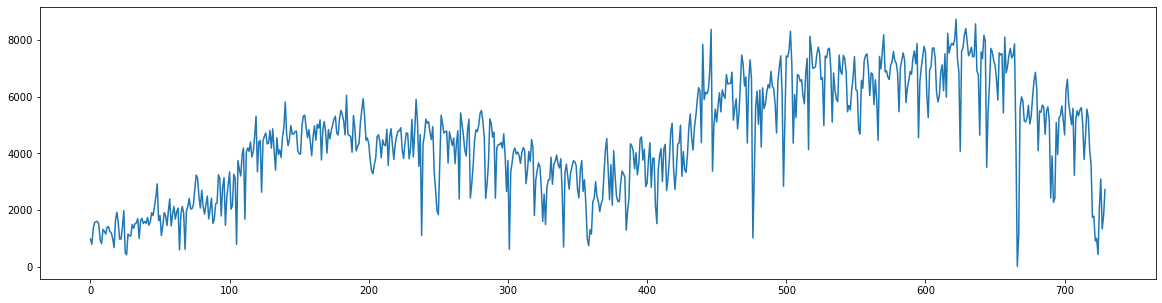

In [167]:
# trend of demand (target variable - 'cnt') over period of two years
plt.figure(figsize=(20,5))
plt.plot(df.cnt)
plt.show()

<Figure size 1080x2160 with 0 Axes>

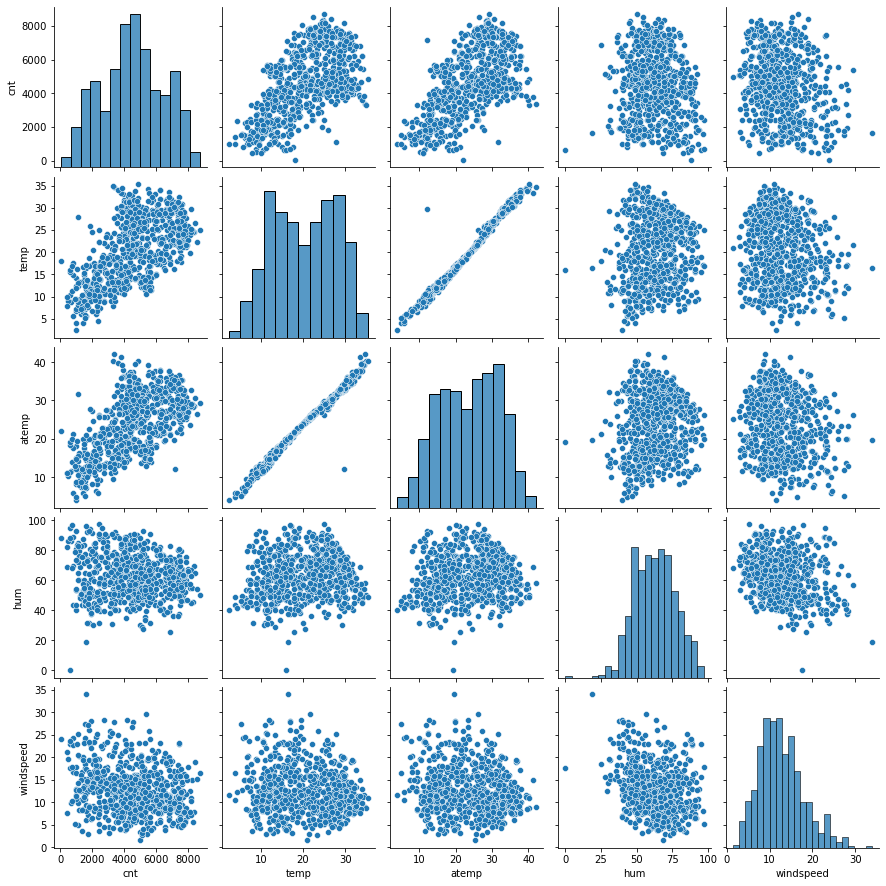

In [168]:
# Numeric Data Visualisation pairplot
plt.figure(figsize = (15,30))
sns.pairplot(data=df,vars=['cnt', 'temp', 'atemp', 'hum','windspeed'])
plt.show()

  #Observation
  ##It seems to be that temp and atemp has the highest corelation with the target variable cnt
   ##temp and atemp are also highly co-related with each other

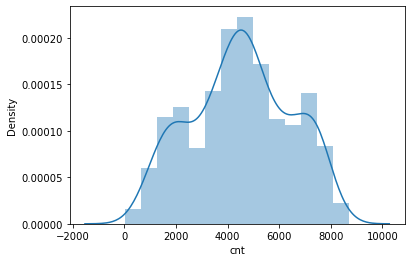

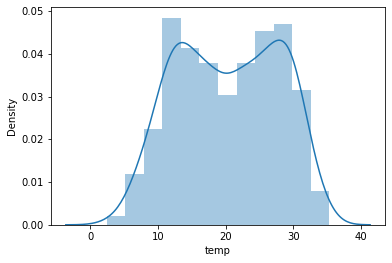

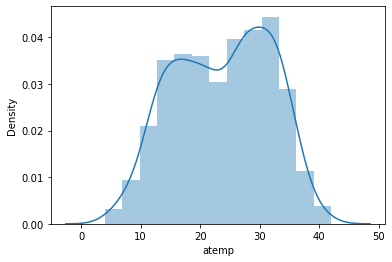

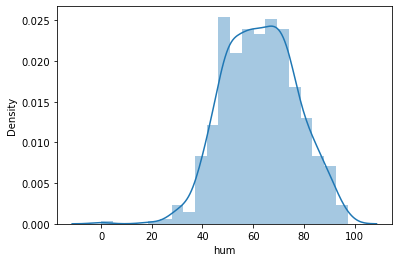

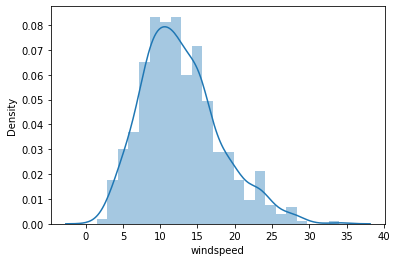

In [169]:
# Numeric Data Visualisation distplot
num_df=['cnt', 'temp', 'atemp', 'hum','windspeed']
for i in num_df:
    sns.distplot(df[i])
    plt.show()

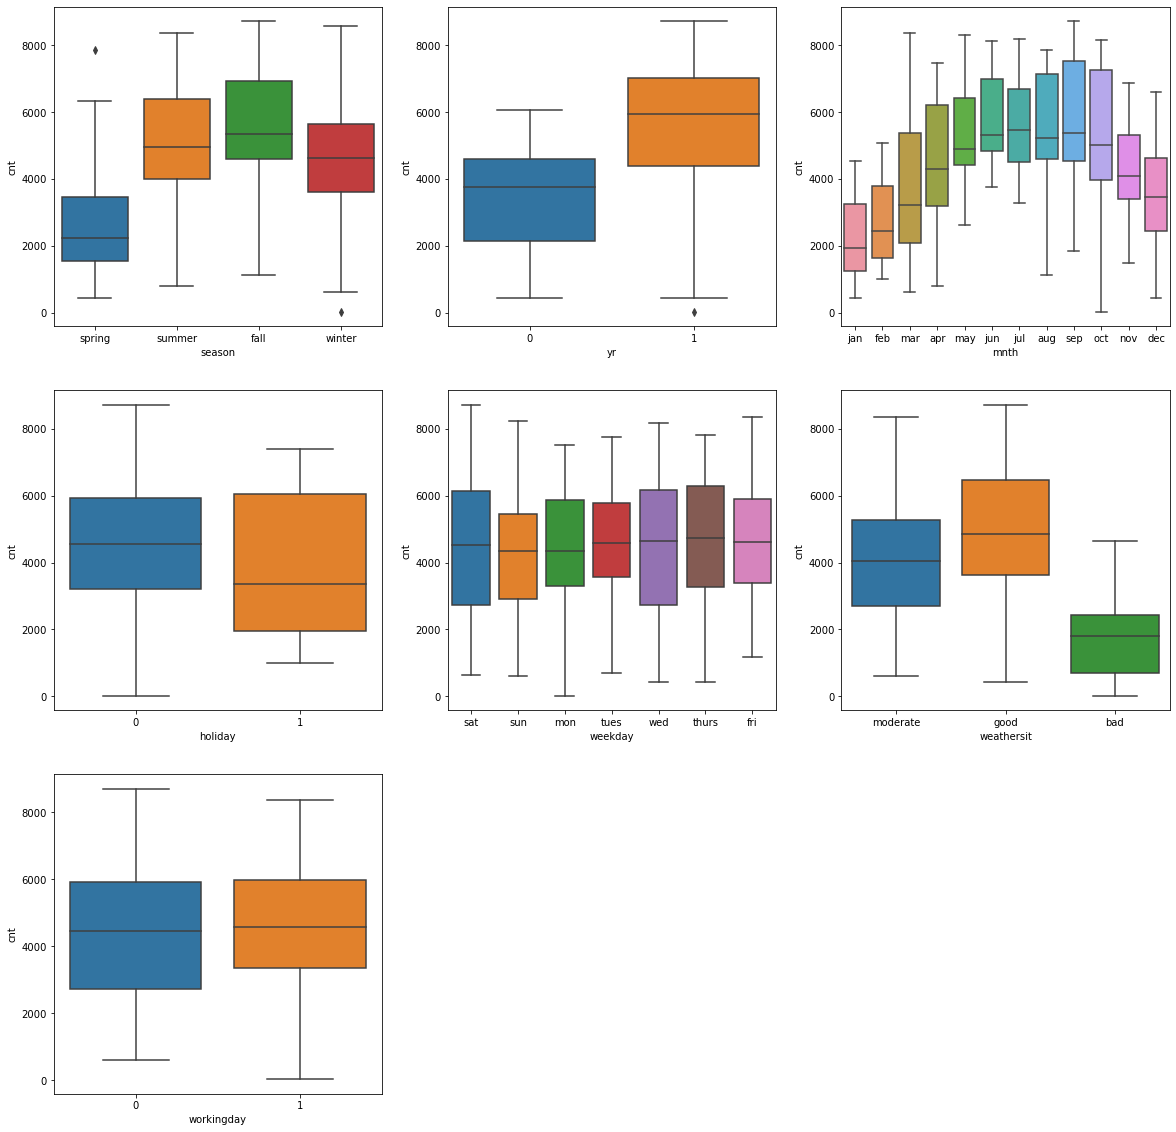

In [170]:
#visualizing categorical variables VS cnt using boxplots

plt.figure(figsize=(20,20))
plt.subplot(331)
sns.boxplot(x='season', y='cnt',data=df)

plt.subplot(332)
sns.boxplot(x='yr', y='cnt',data=df)

plt.subplot(333)
sns.boxplot(x='mnth', y='cnt',data=df)

plt.subplot(334)
sns.boxplot(x='holiday', y='cnt',data=df)

plt.subplot(335)
sns.boxplot(x='weekday', y='cnt',data=df)

plt.subplot(336)
sns.boxplot(x='weathersit', y='cnt',data=df)

plt.subplot(337)
sns.boxplot(x='workingday', y='cnt',data=df)

plt.show()

# Insights:

Numeric visualisation :

    From above (Numeric visualisation) we can see that temp vs atemp and registered vs cnt is showing a positive linear relationship.
    This indicates we have to drop these variables while buiding the model

Categorical visualisation :

    As we can see in the cnt vs season boxplot there is a hike in demand in summer and fall season.
    In 2019 there is a hike in demand of bikes.
    In the cnt vs yr boxplot you can see a increase in demand from month of may which is supposed to be a holidays for childrens and teenagers.
    Week day is not showing and inconsistency over the week.
    In cnt vs weather situation boxplot we can clearly see a drop in demand in the snow weather.

Drop columns that are not useful for analysis

    instant: row instance identifier.
    dteday: since mnth and year and weekday already exists.
    casual & registered variables: casual + registered = cnt, which leads to data leakage.



In [171]:
# Droping instant column as it is index column which has nothing to do with target
df.drop(['instant'], axis = 1, inplace = True)

# Dropping dteday as we have already have month and weekday columns to work with
df.drop(['dteday'], axis = 1, inplace = True)

# Dropping casual and registered columns as as we have cnt column which is sum of the both that is the target column

df.drop(['casual'], axis = 1, inplace = True)
df.drop(['registered'], axis = 1, inplace = True)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    object 
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    object 
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    object 
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(4), object(4)
memory usage: 68.6+ KB


In [172]:
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,jan,0,sat,0,moderate,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,jan,0,sun,0,moderate,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,jan,0,mon,1,good,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,jan,0,tues,1,good,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,jan,0,wed,1,good,9.305237,11.46350,43.6957,12.522300,1600


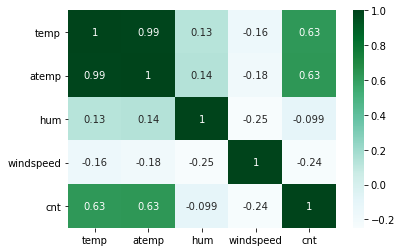

In [173]:
# Checking continuous variables relationship with each other
sns.heatmap(df[['temp','atemp','hum','windspeed','cnt']].corr(), cmap='BuGn', annot = True)
plt.show()

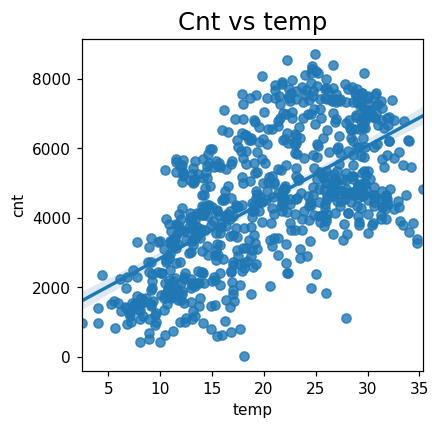

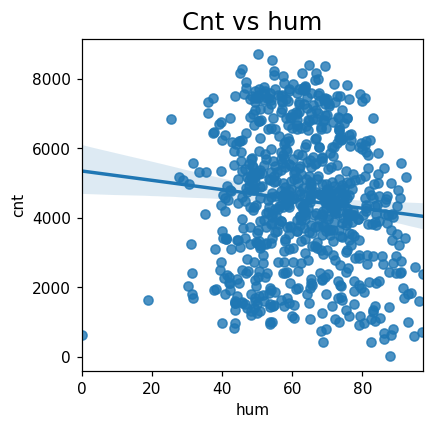

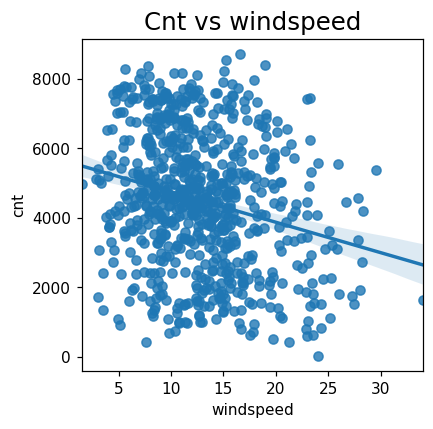

In [174]:
# Numeric Data Visualisation distplot

a_df = ['temp','hum','windspeed']

for i in a_df:
    plt.figure(figsize=(4,4),dpi=110)
    plt.title(('Cnt vs '+ i),fontsize=16)
    sns.regplot(data=df,y="cnt",x=i)
    plt.xlabel(i)
    plt.show()

# Inference:

    It can be seen that cnt is linearly increasing with temp indicating linear relation.
    Demand for bikes is positively correlated to temp.
    Hum is values are more scattered around.
    Although we can see cnt decreasing with increase in humidity.
    Windspeed is values are more scattered around.
    It can be seen that although cnt is decreasing with increase in windspeed.



# 3. Preparing the data (train-test split, rescaling etc)
Creating dummy variables for categorical columns


In [175]:
# creating dummy vars for season

Season = pd.get_dummies(df['season'], drop_first = True)
Season.head()

,spring,summer,winter
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0


In [176]:
# creating dummy vars for month

month = pd.get_dummies(df['mnth'], drop_first = True)
month.head()

,aug,dec,feb,jan,jul,jun,mar,may,nov,oct,sep
0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,0,1,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0,0,0


In [177]:
# creating dummy vars for weekday

Weekday = pd.get_dummies(df['weekday'], drop_first = True)
Weekday.head()

,mon,sat,sun,thurs,tues,wed
0,0,1,0,0,0,0
1,0,0,1,0,0,0
2,1,0,0,0,0,0
3,0,0,0,0,1,0
4,0,0,0,0,0,1


In [178]:
# creating dummy vars for weathersit

weather = pd.get_dummies(df['weathersit'], drop_first = True)
weather.head()

,good,moderate
0,0,1
1,0,1
2,1,0
3,1,0
4,1,0


In [179]:
# Add the results to the original bike sharing dataframe

df = pd.concat([df,weather,Season, month, Weekday], axis = 1)

In [180]:
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,...,may,nov,oct,sep,mon,sat,sun,thurs,tues,wed
0,spring,0,jan,0,sat,0,moderate,14.110847,18.18125,80.5833,...,0,0,0,0,0,1,0,0,0,0
1,spring,0,jan,0,sun,0,moderate,14.902598,17.68695,69.6087,...,0,0,0,0,0,0,1,0,0,0
2,spring,0,jan,0,mon,1,good,8.050924,9.47025,43.7273,...,0,0,0,0,1,0,0,0,0,0
3,spring,0,jan,0,tues,1,good,8.200000,10.60610,59.0435,...,0,0,0,0,0,0,0,0,1,0
4,spring,0,jan,0,wed,1,good,9.305237,11.46350,43.6957,...,0,0,0,0,0,0,0,0,0,1


In [181]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 34 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    object 
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    object 
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    object 
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
 12  good        730 non-null    uint8  
 13  moderate    730 non-null    uint8  
 14  spring      730 non-null    uint8  
 15  summer      730 non-null    uint8  
 16  winter      730 non-null    uint8  
 17  aug         730 non-null    uint8  
 18  dec         730 non-null    uint8  
 19  feb         730 non-null    u

In [182]:
# Drop all columns whose dummies have been created
df.drop(['season', 'weekday', 'mnth', 'weathersit'], axis = 1, inplace = True)

df.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,good,moderate,...,may,nov,oct,sep,mon,sat,sun,thurs,tues,wed
0,0,0,0,14.110847,18.18125,80.5833,10.749882,985,0,1,...,0,0,0,0,0,1,0,0,0,0
1,0,0,0,14.902598,17.68695,69.6087,16.652113,801,0,1,...,0,0,0,0,0,0,1,0,0,0
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,1,0,...,0,0,0,0,1,0,0,0,0,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,1,0,...,0,0,0,0,0,0,0,0,1,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,1,0,...,0,0,0,0,0,0,0,0,0,1


In [183]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 30 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   yr          730 non-null    int64  
 1   holiday     730 non-null    int64  
 2   workingday  730 non-null    int64  
 3   temp        730 non-null    float64
 4   atemp       730 non-null    float64
 5   hum         730 non-null    float64
 6   windspeed   730 non-null    float64
 7   cnt         730 non-null    int64  
 8   good        730 non-null    uint8  
 9   moderate    730 non-null    uint8  
 10  spring      730 non-null    uint8  
 11  summer      730 non-null    uint8  
 12  winter      730 non-null    uint8  
 13  aug         730 non-null    uint8  
 14  dec         730 non-null    uint8  
 15  feb         730 non-null    uint8  
 16  jan         730 non-null    uint8  
 17  jul         730 non-null    uint8  
 18  jun         730 non-null    uint8  
 19  mar         730 non-null    u

# Splitting the Data into Training and Testing Sets

In [184]:
from sklearn.model_selection import train_test_split

# We specify this so that the train and test data set always have the same rows, respectively

df_train, df_test = train_test_split(df, train_size = 0.7, test_size = 0.3, random_state = 100)
print(df_train.shape)
print(df_test.shape)

(510, 30)
(219, 30)


# Rescaling the Features

We will use MinMax scaling.


In [185]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()


# Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables
num_vars = ['temp','atemp','hum', 'windspeed', 'cnt']

df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

df_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,good,moderate,...,may,nov,oct,sep,mon,sat,sun,thurs,tues,wed
653,1,0,1,0.509887,0.501133,0.575354,0.300794,0.864243,1,0,...,0,0,1,0,0,0,0,0,1,0
576,1,0,1,0.815169,0.766351,0.725633,0.264686,0.827658,1,0,...,0,0,0,0,0,0,0,0,1,0
426,1,0,0,0.442393,0.438975,0.640189,0.255342,0.465255,0,1,...,0,0,0,0,0,1,0,0,0,0
728,1,0,0,0.245101,0.200348,0.498067,0.663106,0.204096,1,0,...,0,0,0,0,0,0,1,0,0,0
482,1,0,0,0.395666,0.391735,0.504508,0.188475,0.482973,0,1,...,0,0,0,0,0,1,0,0,0,0


# 4. Training the model
Dividing into X and Y sets for the model building


In [186]:
y_train = df_train.pop('cnt')
X_train = df_train

In [187]:
# Running RFE with the output number of the variable equal to 10
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 15)             # running RFE
rfe = rfe.fit(X_train, y_train)

In [188]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('atemp', False, 6),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('good', True, 1),
 ('moderate', True, 1),
 ('spring', True, 1),
 ('summer', True, 1),
 ('winter', True, 1),
 ('aug', False, 8),
 ('dec', False, 4),
 ('feb', False, 5),
 ('jan', False, 2),
 ('jul', True, 1),
 ('jun', False, 14),
 ('mar', False, 15),
 ('may', False, 7),
 ('nov', False, 3),
 ('oct', False, 11),
 ('sep', True, 1),
 ('mon', False, 9),
 ('sat', True, 1),
 ('sun', True, 1),
 ('thurs', False, 12),
 ('tues', False, 10),
 ('wed', False, 13)]

In [189]:
col = X_train.columns[rfe.support_]
col

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'good',
       'moderate', 'spring', 'summer', 'winter', 'jul', 'sep', 'sat', 'sun'],
      dtype='object')

In [190]:
X_train.columns[~rfe.support_]

Index(['atemp', 'aug', 'dec', 'feb', 'jan', 'jun', 'mar', 'may', 'nov', 'oct',
       'mon', 'thurs', 'tues', 'wed'],
      dtype='object')

In [191]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]

# Model 1

In [192]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_rfe1 = sm.add_constant(X_train_rfe)

In [193]:
lm1 = sm.OLS(y_train,X_train_rfe1)
lm_model1=lm1.fit()   # Running the linear model

In [194]:
#Let's see the summary of our linear model
print(lm_model1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     196.3
Date:                Wed, 08 Feb 2023   Prob (F-statistic):          1.13e-191
Time:                        16:29:34   Log-Likelihood:                 517.87
No. Observations:                 510   AIC:                            -1006.
Df Residuals:                     495   BIC:                            -942.2
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0018      0.038      0.049      0.9

In [195]:
X_train_rfe1.columns

Index(['const', 'yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed',
       'good', 'moderate', 'spring', 'summer', 'winter', 'jul', 'sep', 'sat',
       'sun'],
      dtype='object')

In [196]:
# dropping constant 
X_train_new1 = X_train_rfe1.drop(['const'], axis=1)

In [197]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new1
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,workingday,94.57
13,sat,22.15
14,sun,21.46
6,good,10.23
7,moderate,8.84
8,spring,5.02
1,holiday,4.66
3,temp,3.62
10,winter,3.49
9,summer,2.61


# Model 2

In [198]:
# Dropping 'Sun' since it has high P Value and high VIF
X_train_new2 = X_train_new1.drop(['sun'], axis=1)

In [199]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_rfe2 = sm.add_constant(X_train_new2)
lm2 = sm.OLS(y_train,X_train_rfe2)
lm_model2=lm2.fit()

In [200]:
#Let's see the summary of our linear model
print(lm_model2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     196.3
Date:                Wed, 08 Feb 2023   Prob (F-statistic):          1.13e-191
Time:                        16:29:34   Log-Likelihood:                 517.87
No. Observations:                 510   AIC:                            -1006.
Df Residuals:                     495   BIC:                            -942.2
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0070      0.048     -0.144      0.8

In [201]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new2
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
4,hum,25.03
3,temp,21.43
6,good,14.49
7,moderate,8.87
8,spring,5.53
2,workingday,5.41
5,windspeed,4.66
10,winter,4.05
9,summer,3.18
0,yr,2.09


# Model 3

In [202]:
# Dropping 'hum' (humidity) since it has a high VIF value
X_train_new3 = X_train_new2.drop(['hum'], axis=1)

In [203]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_rfe3 = sm.add_constant(X_train_new3)
lm3 = sm.OLS(y_train,X_train_rfe3)
lm_model3=lm3.fit()

#Let's see the summary of our linear model
print(lm_model3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     203.0
Date:                Wed, 08 Feb 2023   Prob (F-statistic):          5.73e-189
Time:                        16:29:35   Log-Likelihood:                 508.65
No. Observations:                 510   AIC:                            -989.3
Df Residuals:                     496   BIC:                            -930.0
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1328      0.039     -3.418      0.0

In [204]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new3
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
5,good,14.47
3,temp,13.41
6,moderate,8.16
2,workingday,5.32
4,windspeed,4.63
7,spring,4.16
8,summer,2.77
9,winter,2.74
0,yr,2.08
12,sat,1.99


# Model 4

In [205]:
# Dropping 'good' since it has a high VIF value
X_train_new4 = X_train_new3.drop(['good'], axis=1)

In [206]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_rfe4 = sm.add_constant(X_train_new4)
lm4 = sm.OLS(y_train,X_train_rfe4)
lm_model4=lm4.fit()

#Let's see the summary of our linear model
print(lm_model4.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.796
Model:                            OLS   Adj. R-squared:                  0.791
Method:                 Least Squares   F-statistic:                     162.0
Date:                Wed, 08 Feb 2023   Prob (F-statistic):          4.84e-163
Time:                        16:29:35   Log-Likelihood:                 444.31
No. Observations:                 510   AIC:                            -862.6
Df Residuals:                     497   BIC:                            -807.6
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1511      0.035      4.342      0.0

In [207]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new4
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,temp,6.96
2,workingday,5.18
4,windspeed,4.60
6,spring,2.49
7,summer,2.32
0,yr,2.06
8,winter,1.97
11,sat,1.95
9,jul,1.58
5,moderate,1.54


# Model 5

In [208]:
# Dropping 'holiday' since it has a high p value
X_train_new5 = X_train_new4.drop(['holiday'], axis=1)

In [209]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_rfe5 = sm.add_constant(X_train_new5)
lm5 = sm.OLS(y_train,X_train_rfe5)
lm_model5=lm5.fit()

#Let's see the summary of our linear model
print(lm_model5.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.795
Model:                            OLS   Adj. R-squared:                  0.791
Method:                 Least Squares   F-statistic:                     175.9
Date:                Wed, 08 Feb 2023   Prob (F-statistic):          1.25e-163
Time:                        16:29:35   Log-Likelihood:                 443.02
No. Observations:                 510   AIC:                            -862.0
Df Residuals:                     498   BIC:                            -811.2
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1439      0.035      4.163      0.0

In [210]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new5
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,6.72
1,workingday,4.63
3,windspeed,4.58
5,spring,2.38
6,summer,2.31
0,yr,2.06
7,winter,1.91
10,sat,1.82
8,jul,1.58
4,moderate,1.54


# Model 6

In [211]:
# Dropping 'spring' since it has a high p value
X_train_new6 = X_train_new5.drop(['spring'], axis=1)

In [212]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_rfe6 = sm.add_constant(X_train_new6)
lm6 = sm.OLS(y_train,X_train_rfe6)
lm_model6=lm6.fit()

#Let's see the summary of our linear model
print(lm_model6.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.793
Model:                            OLS   Adj. R-squared:                  0.789
Method:                 Least Squares   F-statistic:                     190.9
Date:                Wed, 08 Feb 2023   Prob (F-statistic):          1.94e-163
Time:                        16:29:36   Log-Likelihood:                 439.84
No. Observations:                 510   AIC:                            -857.7
Df Residuals:                     499   BIC:                            -811.1
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0750      0.021      3.577      0.0

In [213]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new6
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,6.34
1,workingday,4.04
3,windspeed,3.41
0,yr,2.01
5,summer,1.75
9,sat,1.69
7,jul,1.53
4,moderate,1.51
6,winter,1.45
8,sep,1.28


# Model 7

In [214]:
# Dropping 'jul' since it has a high p value
X_train_new7 = X_train_new6.drop(['jul'], axis=1)

In [215]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_rfe7 = sm.add_constant(X_train_new7)
lm7 = sm.OLS(y_train,X_train_rfe7)
lm_model7=lm7.fit()

#Let's see the summary of our linear model
print(lm_model7.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.791
Model:                            OLS   Adj. R-squared:                  0.787
Method:                 Least Squares   F-statistic:                     210.3
Date:                Wed, 08 Feb 2023   Prob (F-statistic):          1.01e-163
Time:                        16:29:36   Log-Likelihood:                 437.74
No. Observations:                 510   AIC:                            -855.5
Df Residuals:                     500   BIC:                            -813.1
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0788      0.021      3.760      0.0

In [216]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new7
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,4.76
1,workingday,4.02
3,windspeed,3.39
0,yr,2.01
8,sat,1.68
5,summer,1.57
4,moderate,1.50
6,winter,1.38
7,sep,1.20


This model looks good, as there seems to be VERY LOW Multicollinearity between the predictors and the p-values for all the predictors seems to be significant. For now, we will consider this as our final model(unless the Test data metrics are not significantly close to this number).

Model 7 coefficient values

Const =0.0788
temp=0.5515
workingday=0.0482
windspeed=-0.1839
moderate=-0.0677
Yr=0.2389
summer=0.0875
winter=0.1174
sep=0.0874
sat=0.0593

INSIGHT: From the Model 7 model summary, it is evident that all our coefficients are not equal to zero. which means We REJECT the NULL HYPOTHESIS

F Statistics : F-Statistics is used for testing the overall significance of the Model: Higher the F-Statistics, more significant the Model is.

    F-statistic: 210.32
   
The F-Statistics value of 210.32 (which is greater than 1) and the p-value of '~0.0000' states that the overall model is significant
The equation for best fitted line based on Model 7:

Count=0.07887+(temp∗0.5515)+(workingday*0.0482)−(windspeed∗0.1839)−(weathersit_moderate∗0.0677)+(Season_summer∗0.0875)+(Season_winter∗0.1174)+(Year∗0.2389)+(Month_Sept∗0.0874)+(Weekday_sat∗0.0593)

Interpretation of Coefficients:

    const: The Constant value of ‘0.07887’ indicated that, in the absence of all other predictor variables (i.e. when x1,x2...xn =0), The bike demand still increases by 0.07887 units.

    𝑡𝑒𝑚𝑝: A coefficient value of ‘0.5515’ indicate a unit increase in temp variable, increases the bike demand by .5515 units.
    
    workingday: A coefficient value of ‘0.0482’ indicate a unit increase in workingday variable, increases the bike demand by 0.0482 units.

    𝑤𝑖𝑛𝑑𝑠𝑝𝑒𝑒𝑑: A coefficient value of ‘-0.1839’ indicate a unit increase in windspeed variable, decreases bike demand by 0.1839 units.
    
    weathersit_moderate: A coefficient value of ‘-0.0677’ indicate a unit increase in moderate variable, decreases bike demand by 0.0677 units.

    𝑆𝑒𝑎𝑠𝑜𝑛_𝑠𝑢𝑚𝑚𝑒𝑟: A coefficient value of ‘0.0875’ indicate a unit increase in Season_summer variable, increases bike demand by 0.0875 units.

    𝑆𝑒𝑎𝑠𝑜𝑛_𝑤𝑖𝑛𝑡𝑒𝑟: A coefficient value of ‘0.1174’ indicate a unit increase in Season_winter variable, increases bike demand by 0.1174 units.

    𝑌𝑒𝑎𝑟: A coefficient value of ‘0.2389’ indicate a unit increase in Year_2019 variable, increases the bike demand by 0.2389 units.

    𝑀𝑜𝑛𝑡ℎ_𝑆𝑒𝑝𝑡: A coefficient value of ‘0.0874’ indicate a unit increase in Month_Sept variable, increases the bike demand by 0.0874 units.

    Weekday_sat: A coefficient value of ‘0.0593’ indicate a unit increase if the Weekday is saturday, increases the bike demand by 0.0593 units.




# Residual analysis

Residual analysis of training data

In [217]:
y_train_pred = lm_model7.predict(X_train_rfe7)

Text(0.5, 0, 'Errors')

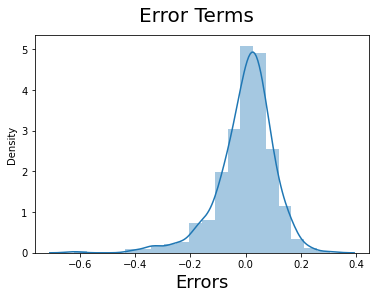

In [218]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_pred), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18) 

Text(0, 0.5, 'Residual')

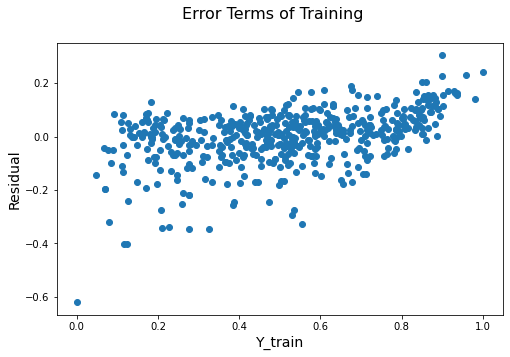

In [219]:
# Error terms
res_train = y_train - y_train_pred
c = [i for i in range(1,len(y_train)+1,1)]
fig = plt.figure(figsize=(8,5))
plt.scatter(y_train,res_train)
fig.suptitle('Error Terms of Training', fontsize=16)              # Plot heading 
plt.xlabel('Y_train', fontsize=14)                      # X-label
plt.ylabel('Residual', fontsize=14) 

In [220]:
#Print R-squared Value Train Data
r2_score(y_train,y_train_pred)

0.7910386989832587

# Predictions and evaluation on the test set

In [221]:
num_vars = ['temp','atemp','hum', 'windspeed', 'cnt']

df_test[num_vars] = scaler.transform(df_test[num_vars])

df_test.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,good,moderate,...,may,nov,oct,sep,mon,sat,sun,thurs,tues,wed
184,0,1,0,0.831783,0.769660,0.657364,0.084219,0.692706,0,1,...,0,0,0,0,1,0,0,0,0,0
535,1,0,1,0.901354,0.842587,0.610133,0.153728,0.712034,1,0,...,0,0,0,0,0,0,0,0,0,1
299,0,0,1,0.511964,0.496145,0.837699,0.334206,0.303382,0,1,...,0,0,1,0,0,0,0,1,0,0
221,0,0,1,0.881625,0.795343,0.437098,0.339570,0.547400,1,0,...,0,0,0,0,0,0,0,0,0,1
152,0,0,1,0.817246,0.741471,0.314298,0.537414,0.569029,1,0,...,0,0,0,0,0,0,0,1,0,0


In [222]:
y_test = df_test.pop('cnt')
X_test = df_test

In [223]:
# Now let's use our model to make predictions.

# Creating X_test_new dataframe by dropping variables from X_test
X_test_new = X_test[X_train_new7.columns]

# Adding a constant variable 
X_test_new = sm.add_constant(X_test_new)

In [224]:
# Making predictions
y_pred = lm_model7.predict(X_test_new)

Text(0, 0.5, 'y_pred')

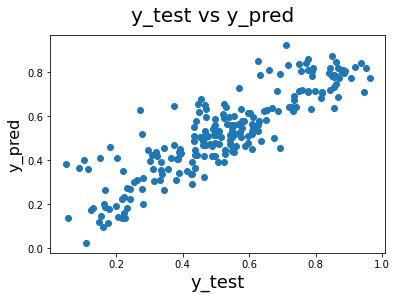

In [225]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)       

We can see there is linear relationship between y_test and y_test_pred

Residual Analysis

In [226]:
from sklearn.metrics import r2_score

r2_test = r2_score(y_test, y_pred)
r2_train = r2_score(y_train, y_train_pred)

print('Test data r^2 :',round((r2_test*100),2))
print('Train data r^2 :',round((r2_train*100),2))

Test data r^2 : 76.92
Train data r^2 : 79.1


Adjusted R^2 Value for TEST

Adjr2=1−(1−R2)∗(n−1)/(n−p−1)

In [227]:
# n for test data ,n1 for train data is number of rows
n = X_test_new.shape[0]
n1 = X_train_rfe7.shape[0]

# Number of features (predictors, p for test data, p1 for train data) is the number of columns
p = X_test_new.shape[1]
p1 = X_train_rfe7.shape[1]


# We find the Adjusted R-squared using the formula

adjusted_r2_test = 1-(1-r2_test)*(n-1)/(n-p-1)
adjusted_r2_train = 1-(1-r2_train)*(n1-1)/(n1-p1-1)

print('Test data adjusted r^2 :',round((adjusted_r2_test*100),2))
print('Train data adjusted r^2 :',round((adjusted_r2_train*100),2))

Test data adjusted r^2 : 75.81
Train data adjusted r^2 : 78.69


FINAL RESULT COMPARISON:

    Test data r^2 : 76.92

    Train data r^2 : 79.1

    Test data adjusted r^2 : 75.81

    Train data adjusted r^2 : 78.69

This seems to be a really good model that can very well 'Generalize' various datasets.

As per our final Model, the below predictor variables influences bike booking :

    Temperature (temp)
    Year -2019
    Speed of the Wind
    Winter Seson    
    September Month
    Summer Seaon
    Moderate
    Saturday
    Workingday



-----------********Finish*******-----------